# **PROJECT BASED TIPE 0**

# **REGRESI BAGGING**

Dzaky Raihan Ahmad - 1301204316

Auzan Fadhlan - 1301204020

Zahran Raihansyah Likumahua - 1301204049

Sumber : 

https://www.kaggle.com/code/arunkumarramanan/data-science-python-fuel-efficiency-prediction

https://www.kaggle.com/code/mostafaashraf1/auto-mpg-regression

https://www.kaggle.com/datasets/uciml/autompg-dataset/code

# **Import Library yang Diperlukan **

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

# **READ DATA**

In [ ]:
#Menampilkan dataset autos-mpg
data=pd.read_csv("autos_mpg.csv")
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
#Menampilkan spesifikasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


# **Eksplorasi Data dan Pra Pemrosesan Data**

**Pemrosesan data null**

In [ ]:
# Mengubah '?' menjadi null
data = data.replace('?',np.NaN)

In [ ]:
# Menampilkan jumlah duplikat
print("Data duplikat yang ada :", data.duplicated().sum(), "\n")

Data duplikat yang ada : 0 



In [ ]:
#Menambahkan data null pada data
null = []
for i in data:
  value = []
  if data[i].isna().sum() > 0:
    null.append(i)

In [ ]:
#Replace data nul dengan sesuatu, disini menggunakan median, dengan menggunakan bantuan imputer
imputer = SimpleImputer(strategy = 'median', missing_values = np.nan)
imputer.fit(data[null])
data[null] = imputer.transform(data[null])

In [ ]:
# Menampilkan data yang kosong setelah diisi
print(data.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64


# **Menampilkan korelasi dan plot**

                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.775396     -0.804203   -0.773453 -0.831741   
cylinders    -0.775396   1.000000      0.950721    0.841284  0.896017   
displacement -0.804203   0.950721      1.000000    0.895778  0.932824   
horsepower   -0.773453   0.841284      0.895778    1.000000  0.862442   
weight       -0.831741   0.896017      0.932824    0.862442  1.000000   
acceleration  0.420289  -0.505419     -0.543684   -0.686590 -0.417457   
model_year    0.579267  -0.348746     -0.370164   -0.413733 -0.306564   
origin        0.563450  -0.562543     -0.609409   -0.452096 -0.581024   

              acceleration  model_year    origin  
mpg               0.420289    0.579267  0.563450  
cylinders        -0.505419   -0.348746 -0.562543  
displacement     -0.543684   -0.370164 -0.609409  
horsepower       -0.686590   -0.413733 -0.452096  
weight           -0.417457   -0.306564 -0.581024  
acceleration      1.000000    0.2881

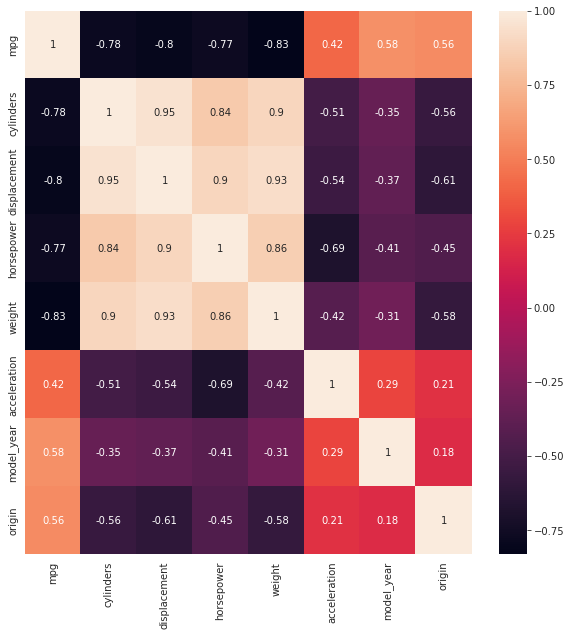

mpg             1.000000
model_year      0.579267
origin          0.563450
acceleration    0.420289
horsepower     -0.773453
cylinders      -0.775396
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64


In [ ]:
print(data.corr())
#Deklarasi plot
fig, ax = plt.subplots(figsize=(10, 10)) 
sns.heatmap(data.corr(), annot=True)
plt.show()

corr_mat=data.corr()
#Menampilkan plot berdasarkan target mpg
print(corr_mat["mpg"].sort_values(ascending=False)) 

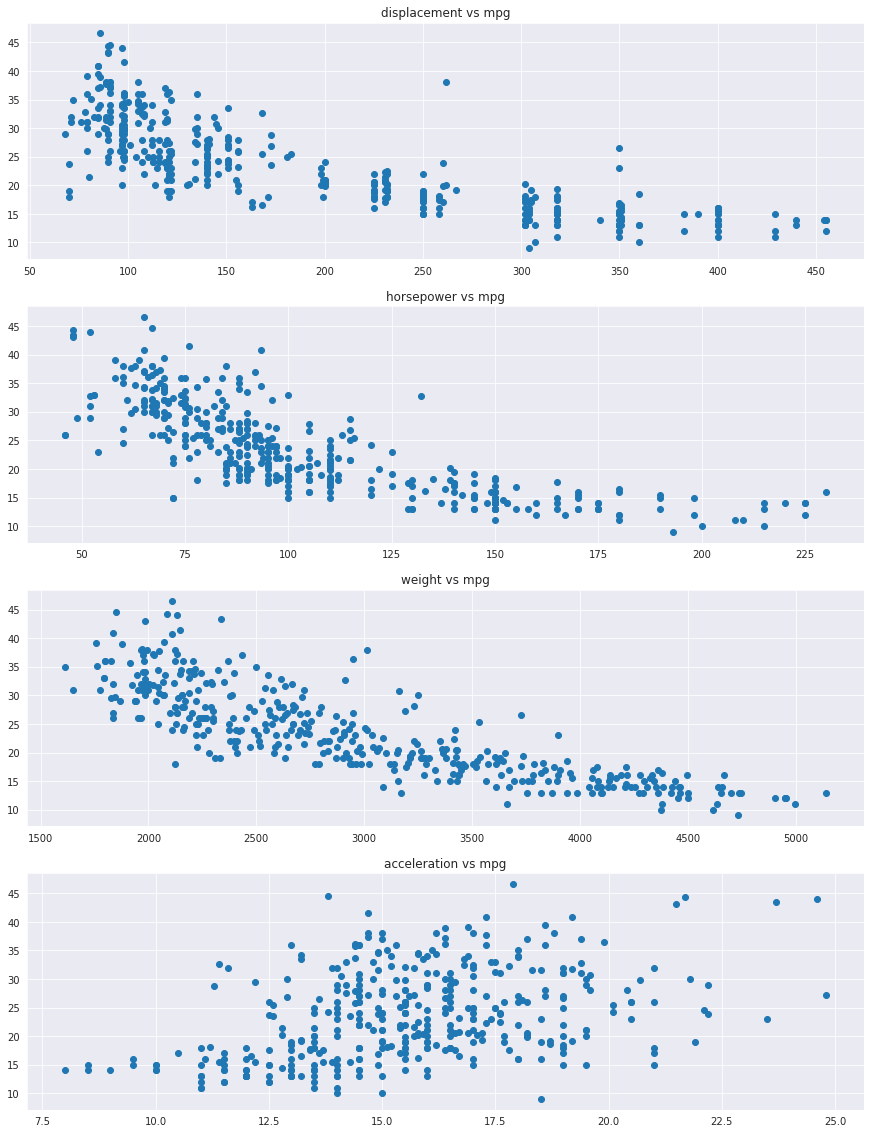

In [ ]:
#Menampilkan scatter plot dari keempat kolom yang dipilih dibandingkan dengan mpgnya
fig, ax = plt.subplots(4, 1,figsize=(15,20))
#Menggunakan 4 data yang dipilih, yaitu data dengan korelasi terbesar. 
pilih = ['displacement', 'horsepower', 'weight', 'acceleration']
for i,x in enumerate(pilih):
    ax[i].scatter(data[x],data['mpg'],label=("{} vs mpg".format(x)))
    ax[i].set_title("{} vs mpg".format(x))
plt.show() 

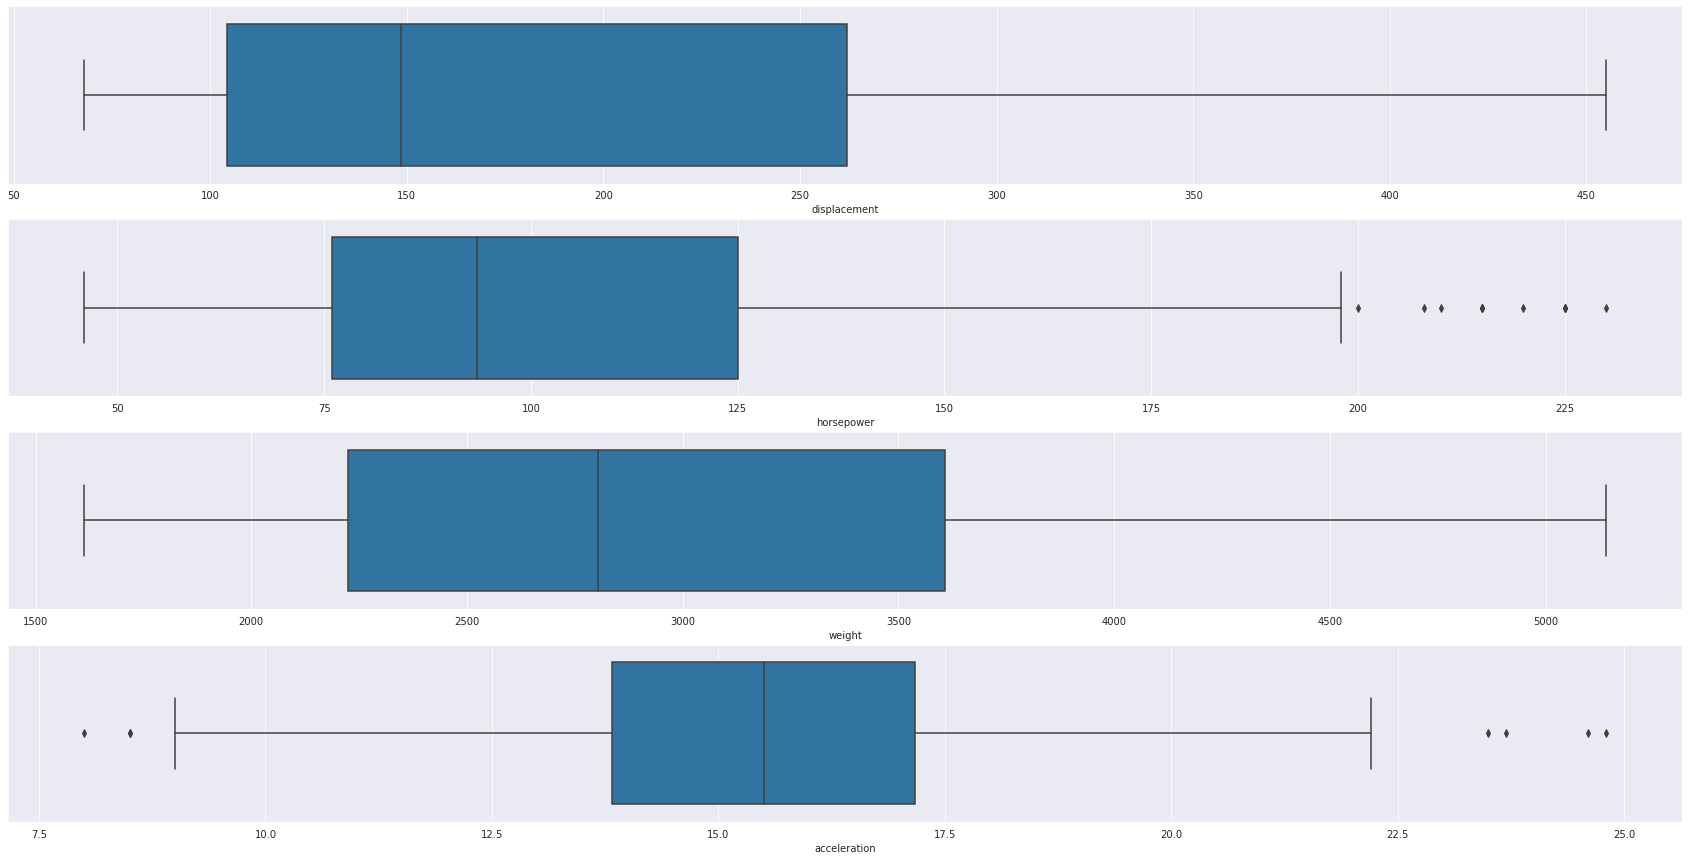

In [ ]:
#Print boxplot
sns.set_style("darkgrid")
#Menampilkan outliers
fig, axes = plt.subplots(4, 1, figsize=(30, 15))
for i,x in enumerate(pilih):
    sns.boxplot(ax=axes[i], x=x, data=data)
plt.show()

# **Handling outliers (Pencilan)**

In [ ]:
# Fungsi menghapus outliers agar tidak ada pencilan yang terlampau jauh
def handling_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    #Menghitung jarak interquartile dengan cara kuartil3 dikurangi kuartil1
    IQR=Q3-Q1
    #Menghitung upper dan lower range
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
#Menjalankan penghapusan outliers
for column in data[pilih].columns:
    print(column)
    lr,ur=handling_outlier(data[column])
    data[column]=np.where(data[column]>ur,ur,data[column])
    data[column]=np.where(data[column]<lr,lr,data[column])

displacement
horsepower
weight
acceleration


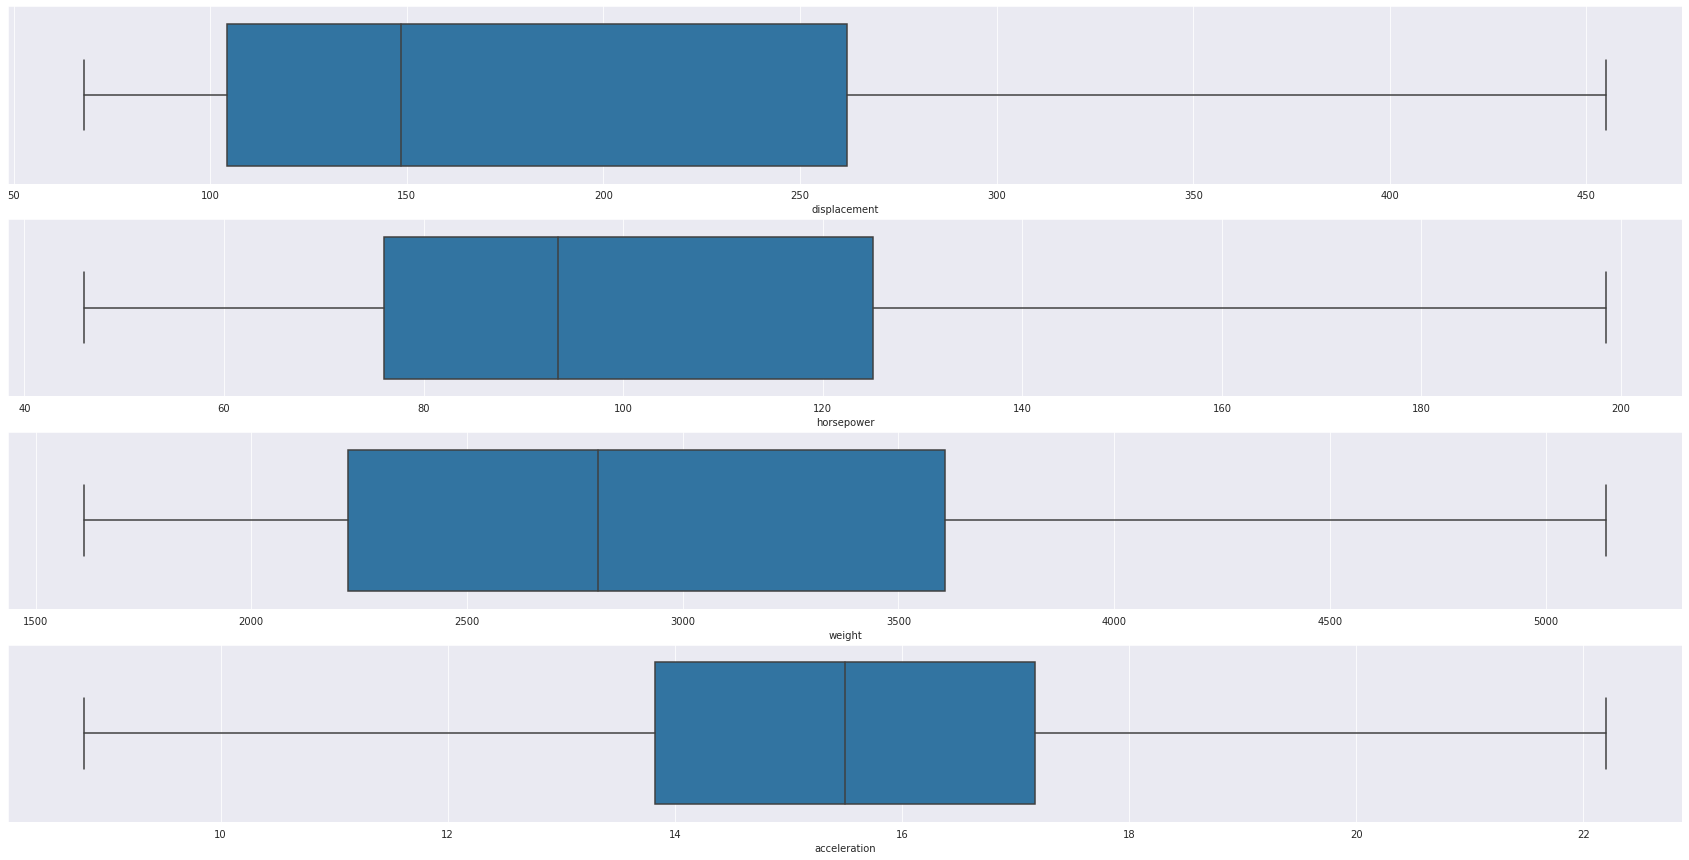

In [ ]:
#Mengecek apakah masih ada outliers atau tidak 
sns.set_style("darkgrid")
fig, axes = plt.subplots(4, 1, figsize=(30, 15))
for i,x in enumerate(pilih):
    sns.boxplot(ax=axes[i], x=x, data=data)
plt.show()

# **Memisahkan data train dan data tes**

In [ ]:
#Pemisahan data test dan train
#Drop data yang tidak dibutuhkan dan dimasukkan pada variabel X, dan data target yaitu mpg pada variabel Y 
X = data.drop(['mpg','car_name',"origin","acceleration","horsepower"],axis='columns')
Y =data['mpg']
#Split data menggunakan test size sebesar 35%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.35)
print("Data train :",len(X_train))
print("Data tes :",len(X_test)) 

Data train : 258
Data tes : 140


# **Scalling**

In [ ]:
#Agar perbedaan data tidak terlalu jauh
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

# **Pemodelan Data (Regresi Bagging)**

In [ ]:
#Modelling
bagging = BaggingRegressor()
#Fit model ke data
bagging.fit(X_train_scaled,Y_train)
#Melakukan prediksi pada data test
Y_pred = bagging.predict(X_test_scaled)

# **Evaluasi**

In [ ]:
#Menampilkan skor, MSE dan RMSE
print("Skor train:",((bagging.score(X_train_scaled,Y_train))*100),"%")
print("Skor Test:",((bagging.score(X_test_scaled,Y_test))*100),"%")
print("Skor Test menggunakan Sklearn Metrics :",((r2_score(Y_test,Y_pred))*100),"%")
print("MSE :",mean_squared_error(Y_test,Y_pred))
print("RMSE :",mean_squared_error(Y_test,Y_pred,squared=False))

Skor train: 96.6184701573493 %
Skor Test: 89.80658793184548 %
Skor Test menggunakan Sklearn Metrics : 89.80658793184548 %
MSE : 5.980323571428573
RMSE : 2.445470010331056


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


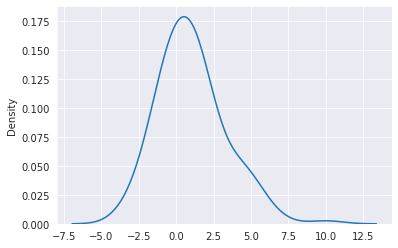

In [ ]:
#Menampung selisih data Y_test dan Y_pred dalam variable selisih
selisih = Y_test - Y_pred
#Menampilkan hasil selisih
sns.set_style('darkgrid')
sns.kdeplot(np.array(selisih), bw=0.5)
plt.show()

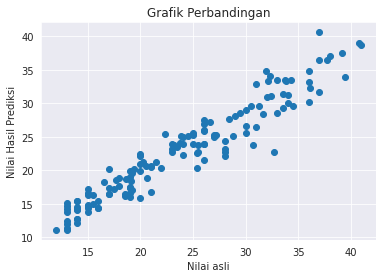

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.title("Grafik Perbandingan")
plt.xlabel("Nilai asli")
plt.ylabel("Nilai Hasil Prediksi")
plt.show()

# **Eksperimen**
Menggunakan test size 45%

In [ ]:
#Drop data yang tidak digunakan
X = data.drop(['mpg','car_name',"origin","acceleration","horsepower"],axis='columns')
Y = data['mpg']
#Split dengan test_size 45%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.45)
print("Data train :",len(X_train))
print("Data tes :",len(X_test)) 

Data train : 218
Data tes : 180


In [ ]:
#Scaling
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [ ]:
#Modelling
bagging = BaggingRegressor()
#Fit model ke data
bagging.fit(X_train_scaled,Y_train)
#Melakukan prediksi pada data test
Y_pred = bagging.predict(X_test_scaled)

In [ ]:
#Menampilkan skor, MSE dan RMSE
print("Skor train :",((bagging.score(X_train_scaled,Y_train))*100),"%")
print("Skor Test :",((bagging.score(X_test_scaled,Y_test))*100),"%")
print("Skor Test Menggunakan Sklearn Metrics :",((r2_score(Y_test,Y_pred))*100),"%")
print("MSE :",mean_squared_error(Y_test,Y_pred))
print("RMSE :",mean_squared_error(Y_test,Y_pred,squared=False))

Skor train : 96.15241352339609 %
Skor Test : 84.12093500769919 %
Skor Test Menggunakan Sklearn Metrics : 84.12093500769919 %
MSE : 9.53900111111111
RMSE : 3.088527336953829


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


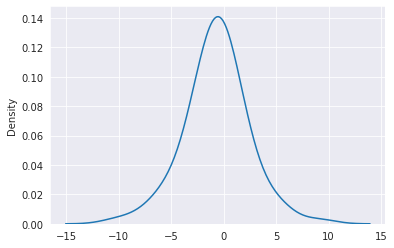

In [ ]:
#Mengitung selisih Y_test dan Y_Pred saat test size = 45%
selisih = Y_test - Y_pred
sns.set_style('darkgrid')
sns.kdeplot(np.array(selisih), bw=0.5)
plt.show()

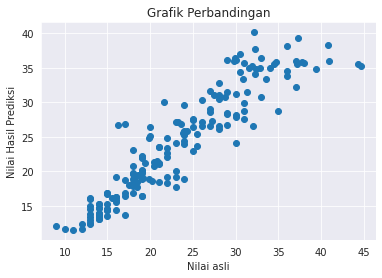

In [ ]:
plt.scatter(Y_test, Y_pred)
plt.title("Grafik Perbandingan")
plt.xlabel("Nilai asli")
plt.ylabel("Nilai Hasil Prediksi")
plt.show()